In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [56]:
#Load Data
df = pd.read_csv('df_bmsales.csv')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  MRPperUnit                 7060 non-null   float64
 13  Years_Open                 8523 non-null   int64

In [58]:
df['Outlet_Size'] = df.Outlet_Size.astype('category')
df['Outlet_Location_Type'] = df.Outlet_Location_Type.astype('category')

# 4. Modeling

## 4.1 Data Splitting, Imputation , Scaling and Encoding

In [59]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import math
import datetime


In [60]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,MRPperUnit,Years_Open
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,b,a,Supermarket Type1,3735.1380,26.861204,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,b,c,Supermarket Type2,443.4228,8.153581,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,b,a,Supermarket Type1,2097.2700,8.092457,14
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,c,Grocery Store,732.3800,9.484115,15
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,c,c,Supermarket Type1,994.7052,6.031512,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,c,c,Supermarket Type1,2778.3834,31.248623,26
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,b,Supermarket Type1,549.2850,12.906563,11
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,a,b,Supermarket Type1,1193.1136,8.030415,9
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,b,c,Supermarket Type2,1845.5976,14.304189,4


In [62]:
X = df.drop(columns=['Item_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'])
y = df.Item_Outlet_Sales

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

In [64]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,MRPperUnit,Years_Open
1921,7.720,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,NaN,c,Grocery Store,15.109663,15
655,19.750,Low Fat,0.014301,Household,103.0332,OUT046,a,a,Supermarket Type1,5.216871,16
2229,NaN,Regular,0.054221,Breads,129.1310,OUT027,b,c,Supermarket Type3,NaN,28
2537,19.350,Low Fat,0.118342,Snack Foods,222.6088,OUT045,NaN,b,Supermarket Type1,11.504331,11
3528,18.350,Regular,0.092150,Frozen Foods,184.8266,OUT013,c,c,Supermarket Type1,10.072294,26
...,...,...,...,...,...,...,...,...,...,...,...
5734,9.395,Regular,0.286345,Fruits and Vegetables,139.1838,OUT010,NaN,c,Grocery Store,14.814667,15
5191,15.600,Low Fat,0.117575,Frozen Foods,75.6670,OUT017,NaN,b,Supermarket Type1,4.850449,6
5390,17.600,Low Fat,0.018944,Health and Hygiene,237.3590,OUT045,NaN,b,Supermarket Type1,13.486307,11
860,20.350,Low Fat,0.054363,Snack Foods,117.9466,OUT017,NaN,b,Supermarket Type1,5.795902,6


In [65]:
cat_bins=['a','b','c']

In [66]:
#list of non-numerical columns
cat_list = [
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Type']

In [67]:
#check the unique value by column
Col_ohe=[]
for col in cat_list:
    Col_ohe.extend(list(df[col].unique()))
    

In [68]:
#list of category type columns
blist = ['Outlet_Size','Outlet_Location_Type']

In [69]:
#list of numerical columns
col_list = ['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']
num_list = list(df.drop(columns=col_list).drop(columns=['Item_Outlet_Sales', 'Outlet_Establishment_Year', 'Item_Weight'],axis=1))

In [70]:
num_list

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'MRPperUnit', 'Years_Open']

In [71]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Item_Weight           4943 non-null   float64 
 1   Item_Fat_Content      5966 non-null   object  
 2   Item_Visibility       5966 non-null   float64 
 3   Item_Type             5966 non-null   object  
 4   Item_MRP              5966 non-null   float64 
 5   Outlet_Identifier     5966 non-null   object  
 6   Outlet_Size           4276 non-null   category
 7   Outlet_Location_Type  5966 non-null   category
 8   Outlet_Type           5966 non-null   object  
 9   MRPperUnit            4943 non-null   float64 
 10  Years_Open            5966 non-null   int64   
dtypes: category(2), float64(4), int64(1), object(4)
memory usage: 478.0+ KB


In [72]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

Bin_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ("ordinal_encoder", OrdinalEncoder())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#combine numeric and categorical pipelines
preprocess_pipe = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_list),
        ('bincat', Bin_transformer, blist),
        ('cat', categorical_transformer, cat_list)
    ])

In [73]:
# fit the pipelines to the training data
preprocess_pipe.fit_transform(X_train)

# apply the pipelines to the training and test data
X_train = preprocess_pipe.transform(X_train)
X_test = preprocess_pipe.transform(X_test)

In [74]:
X_train = pd.DataFrame.sparse.from_spmatrix(X_train, columns = (num_list+blist+Col_ohe))

In [75]:
X_test = pd.DataFrame.sparse.from_spmatrix(X_test, columns = (num_list+blist+Col_ohe))

In [76]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,MRPperUnit,Years_Open,Outlet_Size,Outlet_Location_Type,Low Fat,Regular,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household,Baking Goods,Snack Foods,Frozen Foods,Breakfast,Health and Hygiene,Hard Drinks,Canned,Breads,Starchy Foods,Others,Seafood,OUT049,OUT018,OUT010,OUT013,OUT027,OUT045,OUT017,OUT046,OUT035,OUT019,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3
0,-1.225867,1.606681,-0.401895,0.360953,-0.015833,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.627719,-1.008442,-0.619284,-0.991361,0.103437,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.056443,-0.227068,-0.202535,-0.198131,1.534680,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.532837,1.028038,1.290187,-0.131885,-0.492914,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.295631,0.515355,0.686853,-0.327640,1.296139,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Ridge regression

In [77]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [78]:
ridge = Ridge(random_state= 42)
# find optimal alpha with grid search
param_grid = { 'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV( estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score R-squared: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score R-squared:  0.5558206399141243
Best Params:  {'alpha': 10}


# Lasso Regression

In [79]:
lasso = Lasso(random_state= 42)
# find optimal alpha with grid search
param_grid = { 'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV( estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
lasso_result = grid.fit(X_train, y_train)
print('Best Score R-squared: ', lasso_result.best_score_)
print('Best Params: ', lasso_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 908138078.5265164, tolerance: 1407739.008913246
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 875010392.5288458, tolerance: 1400634.4134411064
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1051885194.4607673, tolerance: 1424811.0650164417
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3

Best Score R-squared:  0.5564605623734821
Best Params:  {'alpha': 1}


# Elastic net model

In [80]:
elastic_net = ElasticNet(random_state= 42)
# find optimal alpha with grid search
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid = GridSearchCV( estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
el_result = grid.fit(X_train, y_train)
print('Best Score MSE: ', -el_result.best_score_)
print('Best Params: ', el_result.best_params_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3155312906.703874, tolerance: 1424811.0650164417
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3113768060.050363, tolerance: 1407739.008913246
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3108752676.0919313, tolerance: 1420001.9457538296
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3

/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2701809198.2293625, tolerance: 1400634.4134411064
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2863303390.5103397, tolerance: 1424811.0650164417
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2786278641.7639303, tolerance: 1407739.008913246
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/pytho

/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1181800897.6173816, tolerance: 1424811.0650164417
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85380430.0606947, tolerance: 1420001.9457538296
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1128063746.2203283, tolerance: 1400634.4134411064
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python

/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7096335106.681561, tolerance: 1420001.9457538296
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7035095039.942983, tolerance: 1407739.008913246
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6721652283.850233, tolerance: 1407739.008913246
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/linahrusere/anaconda3/lib/python3.1

Best Score MSE:  -0.5564605623734821
Best Params:  {'alpha': 1, 'l1_ratio': 1}


# Random Forest Model

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:

rfr = RandomForestRegressor(random_state= 42)
grid_params = {
    'n_estimators': [100,500,1000],
    'max_depth': [3,6,12,24]}

rf_grid_cv = GridSearchCV(estimator=rfr, scoring='r2', param_grid=grid_params, cv=3,n_jobs=-1, verbose=0)

rf_result =rf_grid_cv.fit(X_train, y_train)

# summarize result
print(f"Best Score R-squared: {rf_result.best_score_}")
print(f"Best Hyperparameters: {rf_result.best_params_}")

Best Score R-squared: 0.5923384284579513
Best Hyperparameters: {'max_depth': 6, 'n_estimators': 100}


In [83]:
# XGBoost Model

In [84]:
import xgboost as xgb
from xgboost import XGBRegressor

In [85]:
param_grid={"learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [3],
            "min_child_weight": [ 1 ],
            "reg_alpha":[ 100, 1000],
            "gamma":[ 0.0, 0.2],
            "colsample_bytree":[ 0.5, 0.7],
            'n_estimators': [500, 1000]}
gsc = GridSearchCV(
            estimator=xgb.XGBRegressor(), param_grid = param_grid,
            cv=3, scoring='r2', verbose=1, n_jobs=-1)

gsc.fit(X_train, y_train)

print("Best parameters:", gsc.best_params_)
print("R-squared: ", gsc.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 500, 'reg_alpha': 100}
R-squared:  0.5931182704697437


In [86]:
xgbbest_model = gsc.best_estimator_

In [87]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
from matplotlib import pyplot

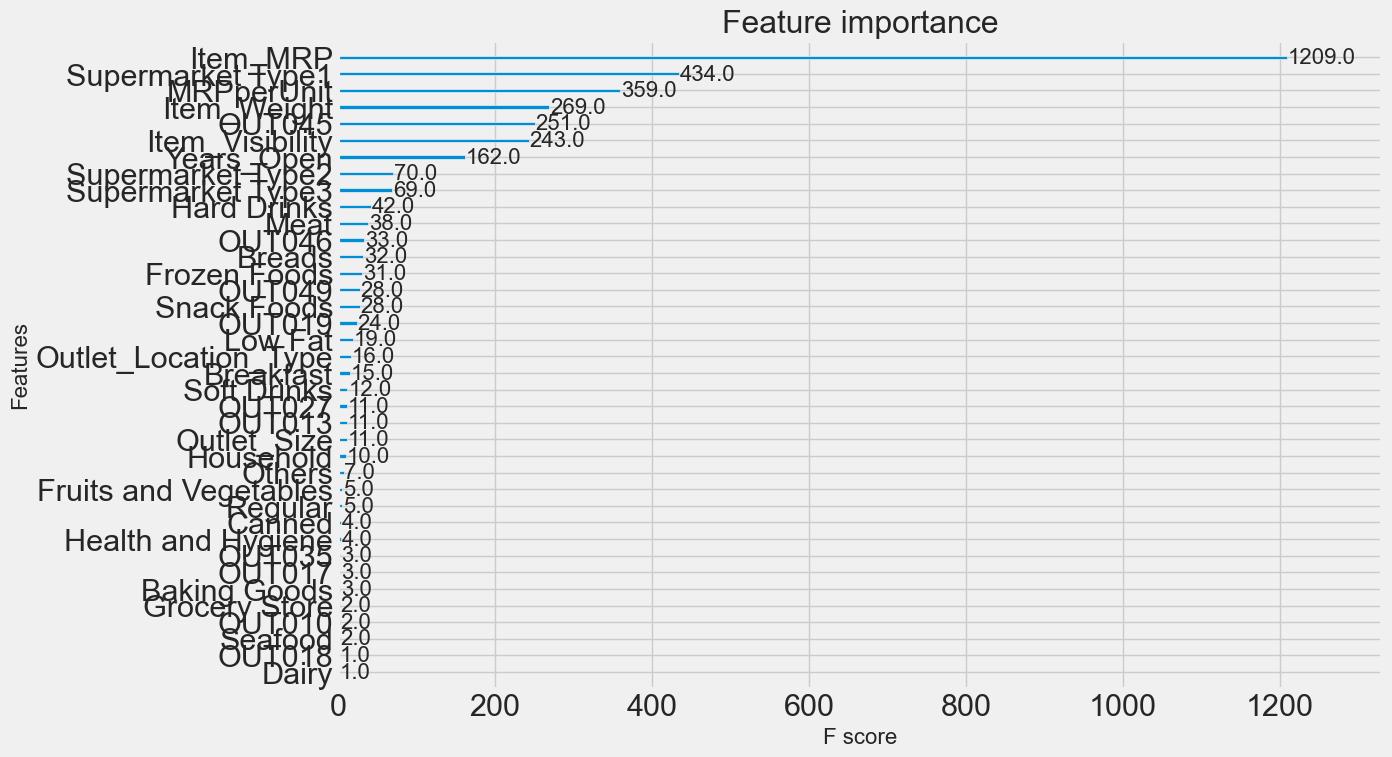

In [88]:
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

plt.rcParams["figure.figsize"] = (12,8) 
plot_importance(xgbbest_model)
plt.show();

In [ ]:
xgbbest_model = gsc.best_estimator_